In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from patsy import dmatrices
import math
from pandas import DataFrame

In [2]:
%matplotlib inline

In [3]:
plt.style.use('ggplot')

In [4]:
plt.rcParams['figure.figsize'] = (13,8)

In [5]:
df=pd.read_csv("./winequality-red.csv")

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [8]:
df.loc[df.quality > 5, 'category'] = 1
df.loc[df.quality <= 5, 'category'] = 0

In [9]:
df['category'].mean()

0.5347091932457786

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0


In [11]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.218072


category
0.0    Axes(0.125,0.125;0.775x0.775)
1.0    Axes(0.125,0.125;0.775x0.775)
Name: sulphates, dtype: object

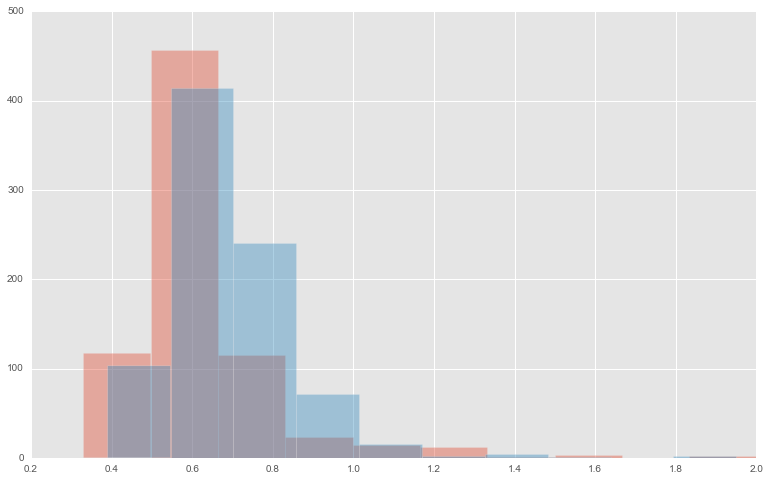

In [12]:
df.groupby('category').sulphates.hist(alpha=0.4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1177ee550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f883f60>]], dtype=object)

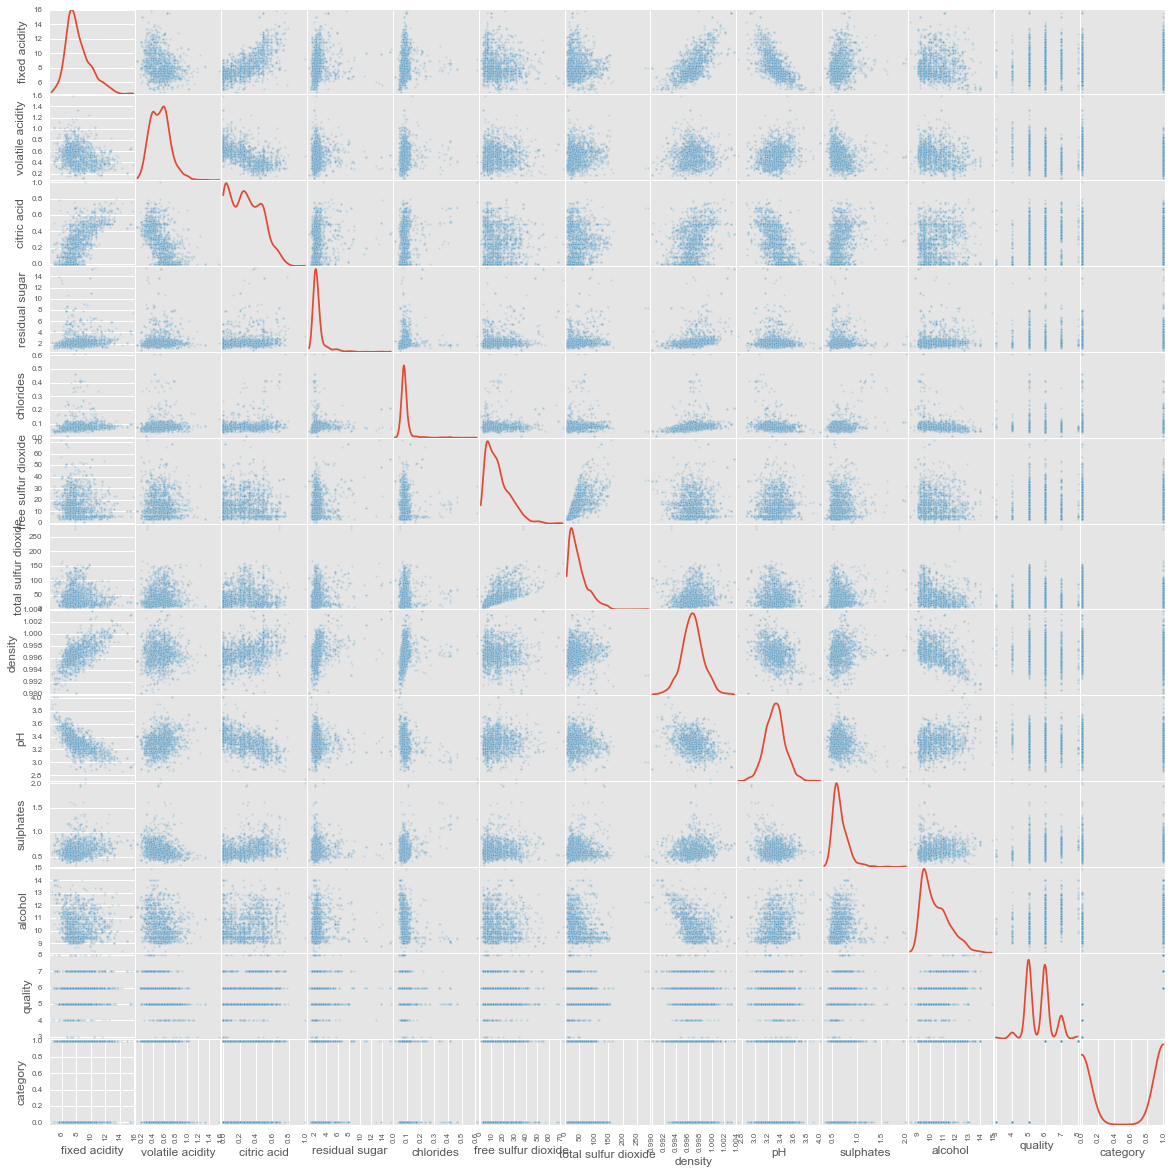

In [13]:
scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal='kde')

In [14]:
X=df['quality']
y=df['category']

In [15]:
X=X.reshape(-1,1)

In [16]:
y, X = dmatrices('category ~ quality',df_test, return_type="dataframe")

NameError: name 'df_test' is not defined

In [ ]:
X.shape

In [ ]:
X

In [ ]:
y=np.ravel(y)

In [ ]:
y.shape

In [ ]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()

In [ ]:
model = model.fit(X, y)

In [ ]:
model.score(X,y)

In [ ]:
pd.DataFrame(list(zip(X, np.transpose(model.coef_))))

In [ ]:
p=DataFrame({'quality':df['quality'],'category1':df['category'],'category2':0.5})

In [ ]:
for i in range(0,1599):
    p.set_value(i,'category2',float(1/(1 + math.exp(5.93252767734 - (2.17194578259*df.iloc[i]['quality'])))))

In [ ]:
p

In [ ]:
df.columns=['fixed','volatile','citric','residual','chlorides','free','total','density','pH','sulphates','alcohol',
            'quality','category']

In [ ]:
df_train=df.iloc[:500,]
df_test=df.iloc[500:,]

In [ ]:
y2, X2 = dmatrices('category ~ volatile+alcohol',df_test, return_type="dataframe")

In [ ]:
y2 = np.ravel(y2)

In [ ]:
model = model.fit(X2, y2)

In [ ]:
y2.shape

In [ ]:
y3, X3 = dmatrices('category ~ volatile+alcohol',df_test, return_type="dataframe")

In [ ]:
y3 = np.ravel(y3)

In [ ]:
model.score(X3,y3)

In [ ]:
pd.DataFrame(list(zip(X2.columns, np.transpose(model.coef_))))

In [ ]:
#df.plot(x="alcohol", y="volatile acidity", kind="scatter", c="category")
ax = df[df.category == 1].plot(x="alcohol", y="volatile", kind="scatter", color="red", label="HIGH", s=100, alpha=0.5)
df[df.category == 0].plot(x="alcohol", y="volatile", kind="scatter", color="green", label="LOW", s=100, alpha=0.5, ax=ax)

In [ ]:
p=DataFrame({'volatile':df['volatile'],'category1':df['category'],'category2':0.5})

In [ ]:
p

In [ ]:
for i in range(0,1599):
    p.set_value(i,'category2',float(1/(1 + math.exp(2.22476359559 + (2.2931794848*df.iloc[i]['volatile'])\
                                               -(0.551345229011*df.iloc[i]['alcohol'])))))

In [ ]:
df.iloc[1598]['volatile']

In [ ]:
df.shape

In [ ]:
p

In [ ]:
type(p['category2'])

In [ ]:
type(p.iloc[2]['category2'])

In [ ]:
ts = pd.Series(p['category2'], p['volatile'])#index=pd.date_range('1/1/2000', periods=1000))
ts=ts.cumsum()
ts.plot()

In [ ]:
p.plot()

In [ ]:
1/(1+math.exp(1))